In [1]:
from dolfin import *

In [2]:
# Create mesh and define function space
mesh = UnitSquareMesh(30, 30)
V = FunctionSpace(mesh, "Lagrange", 1)

In [3]:
# Define Dirichlet boundary (x = 0 or x = 1)
def boundary(x, on_boundary):
    return on_boundary

In [4]:
# Define boundary condition
u_D = Expression('1 + x[0] * x[0] + 2 * x[1] * x[1]', degree=2)
bc = DirichletBC(V, u_D, boundary)

In [5]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

In [6]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)

In [7]:
# Save solution in VTK format
file = File("poisson.pvd")
file << u

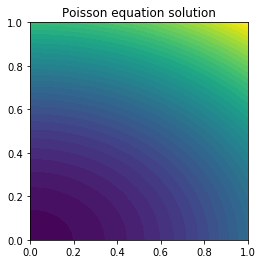

In [13]:
# Plot solution
plot(u, title="Poisson equation solution")

In [10]:
# L^2 norm error calculation
error = errornorm(u_D, u, 'L2')
print(error)

0.0005856069740985263


In [11]:
# Calculate vertex values of real and machine solutions 
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)

In [12]:
# Calculate max error
import numpy as np
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))
print(error_max)

1.73194791842e-14
